## Load data

In [1]:
import pandas as pd 
data_fb=pd.read_csv('FacebookLifetime.csv')

In [2]:
del data_fb['Unnamed: 0'] 


## Feature engineering

In [3]:
data_fb['Time']=pd.to_datetime(data_fb['Time'].astype(str))  #convert time

In [4]:
# data_fb['Time']=pd.to_datetime(data_fb['Time']).dt.time

days_map={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
data_fb['Days']=data_fb['Day posted'].map(days_map) 

bins = [0, 6, 12, 18, 24]
# add custom labels if desired
labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']
# add the bins to the dataframe
data_fb['Time Bin'] = pd.cut(data_fb.Time.dt.hour, bins, labels=labels, right=False)

Time_map={'00:00-05:59':1, '06:00-11:59':2, '12:00-17:59':3, '18:00-23:59':4}
data_fb['Time_posted']=data_fb['Time Bin'].map(Time_map)

data_fb.sample(10)


,Post Message,Type,Posted,Lifetime Post organic reach,Lifetime Post Organic Impressions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime Engaged Users,Lifetime People who have liked your Page and engaged with your post,Lifetime Talking About This (Post) by action type - like,Post Mesage,Day posted,Date,Time,Days,Time Bin,Time_posted
58,Rowing harder doesn’t help if your boat is hea...,Video,2021-08-23 14:20:26,350.0,356.0,343.0,335.0,8.0,4.0,4.0,Rowing harder doesn’t help if your boat is hea...,Monday,2021-08-23,2022-03-29 21:20:26+03:00,1,18:00-23:59,4
53,#DigitalMarketing Tip: Use data based insights...,Video,2021-09-07 13:10:12,263.0,286.0,262.0,245.0,6.0,3.0,4.0,#DigitalMarketing Tip: Use data based insights...,Tuesday,2021-09-07,2022-03-29 20:10:12+03:00,2,18:00-23:59,4
47,If your digital marketing agency pursues creat...,Link,2021-04-05 08:53:16,516.0,550.0,537.0,507.0,3.0,2.0,2.0,If your digital marketing agency pursues creat...,Monday,2021-04-05,2022-03-29 15:53:16+03:00,1,12:00-17:59,3
54,"95% of purchasing choices are subconscious, ac...",Photo,2021-09-02 11:23:03,1138.0,1157.0,1141.0,1127.0,5.0,3.0,5.0,"95% of purchasing choices are subconscious, ac...",Thursday,2021-09-02,2022-03-29 18:23:03+03:00,4,18:00-23:59,4
113,"As we remember Dr. Martin Luther King Jr., we ...",Video,2022-01-17 12:10:14,338.0,373.0,354.0,322.0,6.0,3.0,5.0,"As we remember Dr. Martin Luther King Jr., we ...",Monday,2022-01-17,2022-03-29 19:10:14+03:00,1,18:00-23:59,4
75,3 Cs of Marketing: CHOICES. CHANCES. CHANGES. ...,Unknown,2021-11-30 09:00:02,1448.0,1449.0,1436.0,1442.0,6.0,5.0,3.0,3 Cs of Marketing: CHOICES. CHANCES. CHANGES. ...,Tuesday,2021-11-30,2022-03-29 16:00:02+03:00,2,12:00-17:59,3
55,A whopping 66% of customers expect companies t...,Photo,2021-08-31 12:19:01,875.0,875.0,863.0,893.0,4.0,2.0,4.0,A whopping 66% of customers expect companies t...,Tuesday,2021-08-31,2022-03-29 19:19:01+03:00,2,18:00-23:59,4
97,One thing we’ve all discovered is that things ...,Video,2022-03-04 14:13:19,374.0,375.0,366.0,365.0,2.0,1.0,1.0,One thing we’ve all discovered is that things ...,Friday,2022-03-04,2022-03-29 21:13:19+03:00,5,18:00-23:59,4
38,Your digital marketing is too important to be ...,Video,2021-05-30 00:29:21,277.0,299.0,282.0,263.0,6.0,4.0,2.0,Your digital marketing is too important to be ...,Sunday,2021-05-30,2022-03-29 07:29:21+03:00,7,06:00-11:59,2
39,Think big! While there’s also something to be ...,Photo,2021-05-21 08:00:48,604.0,628.0,615.0,595.0,5.0,2.0,5.0,Think big! While there’s also something to be ...,Friday,2021-05-21,2022-03-29 15:00:48+03:00,5,12:00-17:59,3


## Wordcloud
Understand the maximum type of words used in the posts

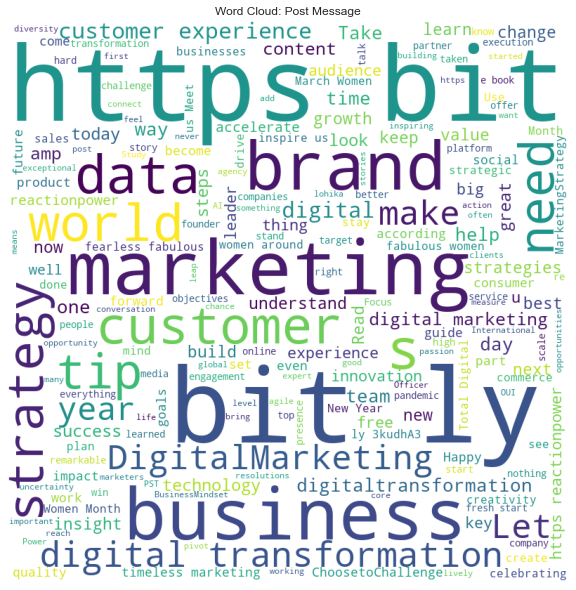

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
stopwords.add('will')
import re
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')

def WordCloudPlotter(dfColumn):
    colData=data_fb[dfColumn]
    textCloud=''

    #text processing,convrting column to a single line of text
    for mem in colData:
        textCloud=textCloud + str(mem)
    #plotting word cloud
    wordcloud=WordCloud(width=800,height=800,background_color='white',stopwords=stopwords,min_font_size=10).generate(textCloud)
    plt.figure(figsize=(8,8),facecolor=None)
    plt.style.use('seaborn-whitegrid')
    plt.imshow(wordcloud)
    plt.rcParams.update({'font.size':25})
    plt.axis('off')
    plt.title('Word Cloud: '+ str(dfColumn))
    plt.tight_layout(pad=0)


    plt.show()

WordCloudPlotter('Post Message')

## Number of liimpressions  based with the day and time posted

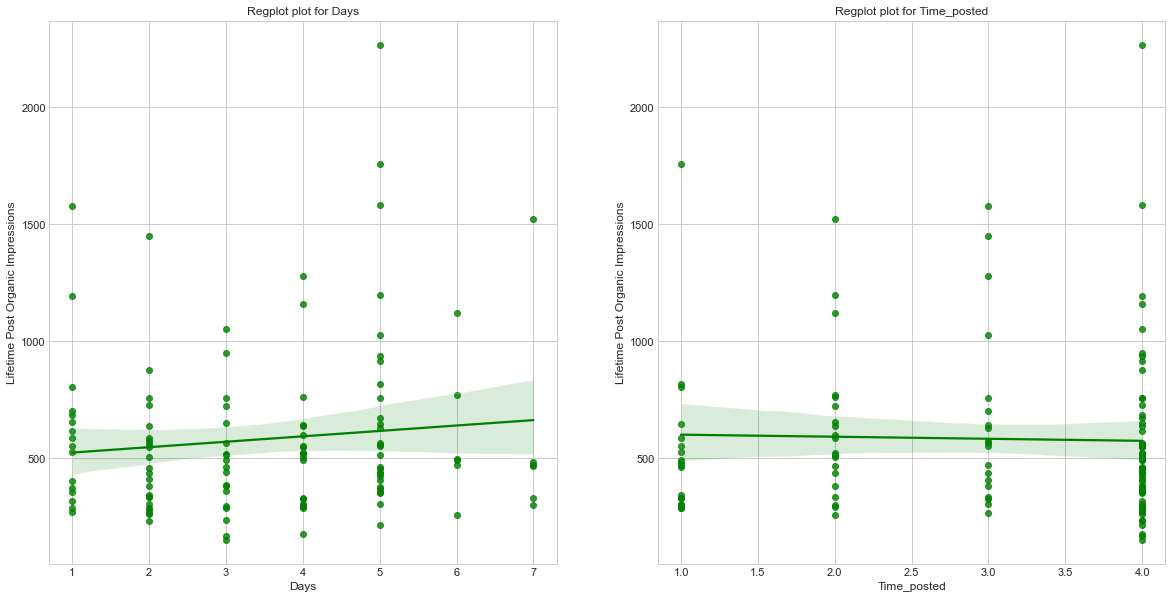

In [7]:
def PlotData(features):
    plt.figure(figsize=(20,10))
    pltNum=1
    for mem in features:
        plt.subplot(1,2,pltNum)
        plt.style.use('seaborn-whitegrid')
        plt.grid(True)
        plt.title('Regplot plot for '+ str(mem))
        sns.regplot(data=data_fb, x=mem, y='Lifetime Post Organic Impressions',color='green')
        pltNum += 1
    plt.show()

PlotData(['Days','Time_posted'])

## Modeling

In [8]:
import numpy as np 
features=np.array(data_fb[['Days','Time_posted']],dtype='float32')
targets=np.array(data_fb['Lifetime Post Organic Impressions'],dtype='float32')
maxValLikes=max(targets)
print('Max value of target {}'.format(maxValLikes))

Max value of target 2265.0


### Training model

In [9]:
targets=targets/maxValLikes
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest =train_test_split(features, targets, test_size=0.1, random_state=42)


stdSc= StandardScaler()
xTrain=stdSc.fit_transform(xTrain)
xTest=stdSc.transform(xTest)

from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()


In [10]:
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

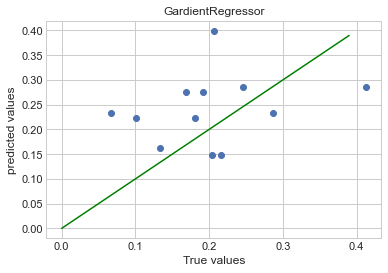

In [11]:
predictions=gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.style.use('seaborn-whitegrid')
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.title('GardientRegressor')
plt.plot(np.arange(0,0.4,0.01),np.arange(0,0.4,0.01),color='green')
plt.grid(True)

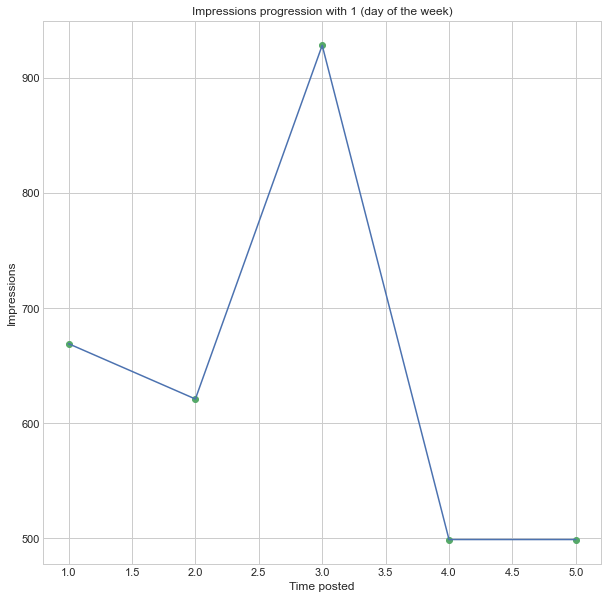

In [12]:
def PredictionsWithDayPosted(model, daycount, scaller, maxVal):
    followers = daycount * np.ones(5)
    time_posted = np.arange(1,6)
    
    # defining vector 
    featureVector = np.zeros((5, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = time_posted
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(time_posted, predictions)
    plt.style.use('seaborn-whitegrid')
    plt.scatter(time_posted, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('Time posted')
    plt.ylabel('Impressions')
    plt.title('Impressions progression with ' + str(daycount) +' (day of the week)')
    plt.show()
    
PredictionsWithDayPosted(gbr, 1, stdSc, maxValLikes)

In [ ]:
'00:00-05:59':1, '06:00-11:59':2, '12:00-17:59':3, '18:00-23:59':4

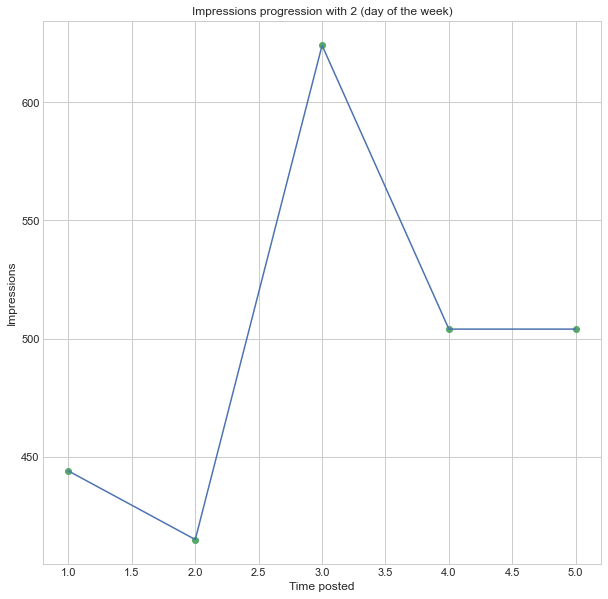

In [ ]:
PredictionsWithDayPosted(gbr, 2, stdSc, maxValLikes)

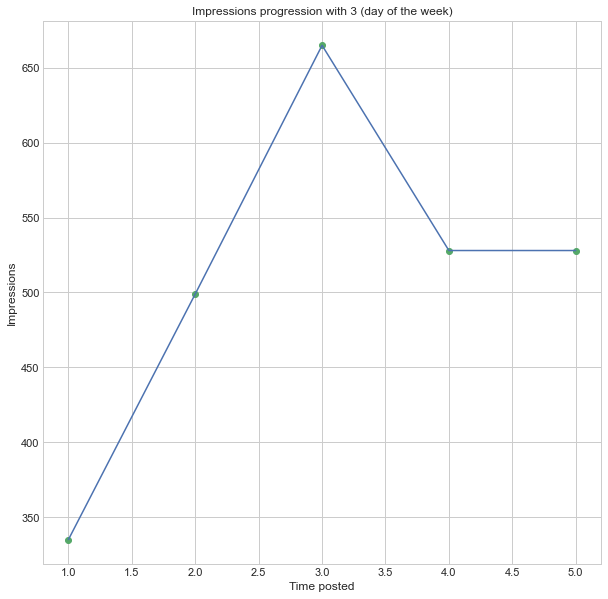

In [ ]:
PredictionsWithDayPosted(gbr, 3, stdSc, maxValLikes)

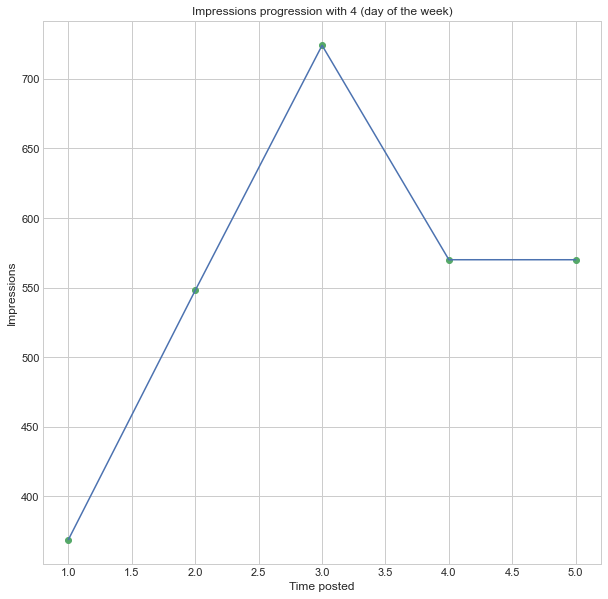

In [ ]:
PredictionsWithDayPosted(gbr, 4, stdSc, maxValLikes)

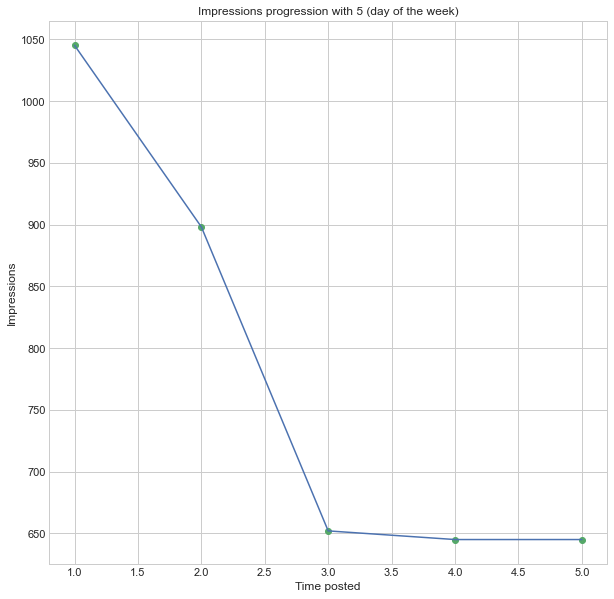

In [ ]:
PredictionsWithDayPosted(gbr, 5, stdSc, maxValLikes)

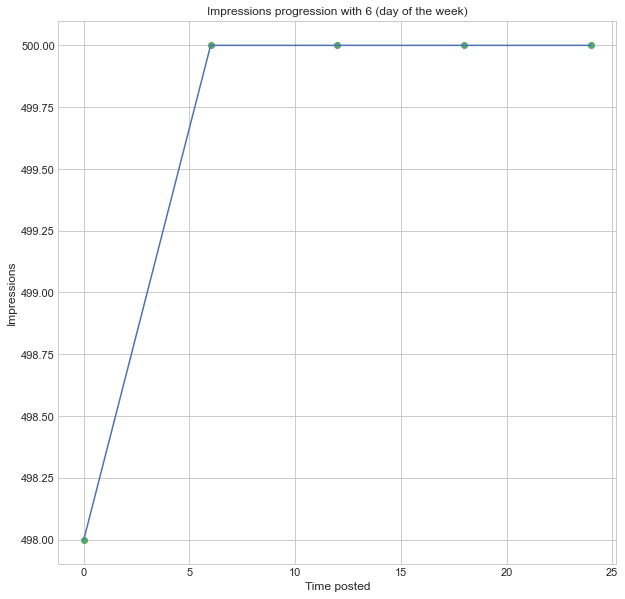

In [ ]:
PredictionsWithDayPosted(gbr, 6, stdSc, maxValLikes)

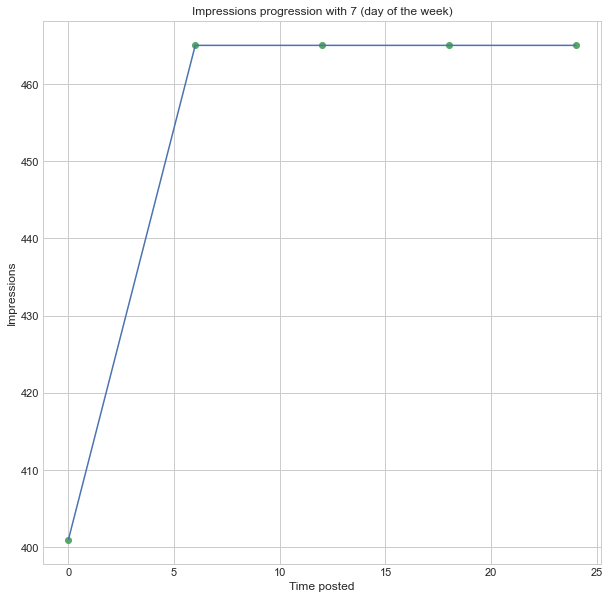

In [ ]:
PredictionsWithDayPosted(gbr, 7, stdSc, maxValLikes)